In [1]:
import cv2
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

from preprocessing import get_bbox
from model import Model
from training_config import augmentations

In [2]:
PATH = 'example/'
GLOBAL_PATH = '/home/jupyter-igor_busov/wheat_wrapper/pubescence/Glume-pubescence-prediction-of-spikelets-main'

In [3]:
mask = cv2.imread(os.path.join(PATH, 'mask.png'))
img = cv2.imread(os.path.join(PATH, 'img.jpg'))

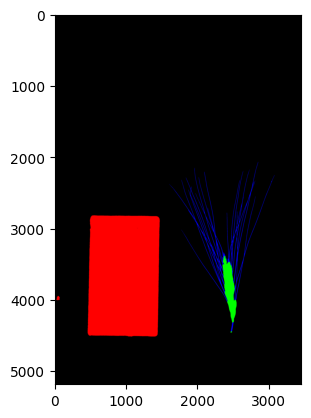

In [4]:
plt.imshow(mask)

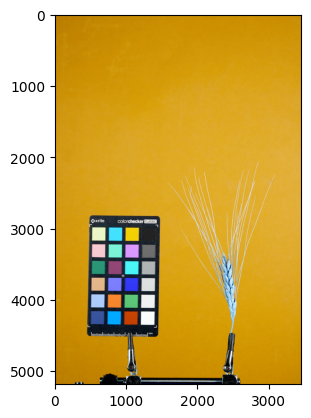

In [5]:
plt.imshow(img)

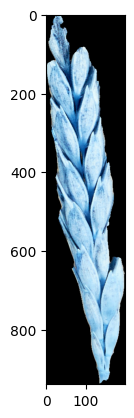

In [6]:
bbox = get_bbox(img, mask, dilation=False)
plt.imshow(bbox)

In [7]:
bbox.shape

(939, 200, 3)

In [10]:
bbox[None].shape

(1, 939, 200, 3)

In [12]:
 preprocessed_img = augmentations['inference_transforms'](image=bbox)['image']

In [13]:
preprocessed_img = np.moveaxis(preprocessed_img, -1, 0)

In [14]:
type(preprocessed_img)

numpy.ndarray

In [42]:
preprocessed_img[None].shape

(1, 3, 480, 480)

In [18]:
os.getcwd()

'/home/jupyter-igor_busov/wheat_wrapper/pubescence/Glume-pubescence-prediction-of-spikelets-main'

In [19]:
model = Model('efficientnet_b1', os.getcwd())

In [21]:
model.model.load_state_dict(torch.load('EfficientNet-B1.zip'))

<All keys matched successfully>

In [22]:
model.predict(preprocessed_img[None])

array([0])